# ML Lab Week1 by Smeet Dedhia 200968236
## Exercise 1

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

### 1. Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line.

In [2]:
def myFnLinReg(x,y):
    
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    b1_num = np.sum(np.multiply((x - x_mean),(y-y_mean)))
    b1_den = np.sum(np.multiply((x-x_mean),(x-x_mean)))
    b1 = b1_num/b1_den
    
    b0 = y_mean - (b1 * x_mean)
    
    return b0,b1

The regression line: y = b0 + b1*x

### 2. Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (70 %,30%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.

In [3]:
#Importing the mtcars dataset
df = pd.read_csv("mtcars.csv")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
# wt is X, mpg is y
x = df["wt"]
y = df["mpg"]

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)

In [6]:
#Fitting the model
b0,b1 = myFnLinReg(x_train, y_train)
print("Coeeficients & Regression line: y = {} + {}*x".format(b0,b1))

Coeeficients & Regression line: y = 36.54574447947914 + -5.309222506694093*x


### 3. What is the mpg of a car, whose weight is 6.7?

In [7]:
#Function for Linear Model
def LinearModel(b0,b1):
    def reg(x):
        y = b0 + b1*x
        return y
    return reg

In [8]:
mpg_model = LinearModel(b0,b1)
print("MPG for weight 6.7: ")
mpg_model(6.7)

MPG for weight 6.7: 


0.973953684628718

### 4. Compute and print accuracy measures such as RMSE and R2 for the test set.

In [9]:
def RMSE(y_pred, y_test):
    return np.sqrt(((y_pred - y_test) ** 2).mean())
y_pred = mpg_model(x_test)

print("RMSE:")
RMSE(y_pred,y_test)

RMSE:


3.5136666229354017

The RMSE value obtained is 3.51

In [10]:
numerator =0
denominator=0

numerator = np.sum((y_pred-y_test)**2)
denominator = np.sum(((y_pred-np.mean(y_test))**2))

r2=1-(numerator/denominator)
print("R2: ")
r2

R2: 


0.6595604836717412

The R-square value obtained is 0.66 indicating that our model is almost 66% accurate

#### RMSE & R2 Using sklearn library:

In [11]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

3.5136666229354017

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6801791303874818

### 5. Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function.

#### Stochastic Gradient Descent

In [13]:
import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.05):
    number_of_features = 1
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
      
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T*(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list


w1, b1, cost1, cost_list1, epoch_list1 = stochastic_gradient_descent(x_train.values,y_train.values.reshape(y_train.shape[0],),15000)
w1, b1, cost1

(array([-5.02826216]), array([35.90670855]), array([3.22883461]))

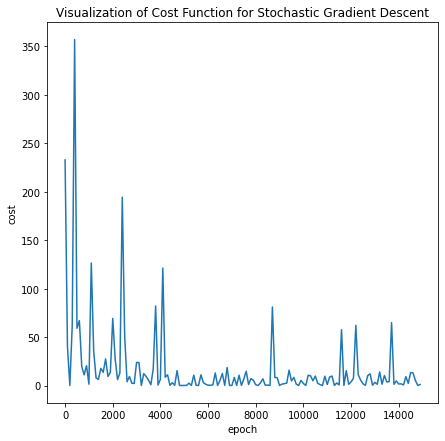

In [14]:
plt.figure(figsize=(7,7))
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list1,cost_list1)
plt.title("Visualization of Cost Function for Stochastic Gradient Descent")
plt.show()


#### Mini Batch Gradient Descent

In [15]:
import random
def mb_gradient_descent(X, y_true, epochs, learning_rate = 0.05):
 
    number_of_features = 1
   
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        indices = np.random.randint(0,total_samples-1,10)
        sample_x = X[indices]
        sample_y = y_true[indices]
        
    
        y_predicted = w*sample_x.T + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        
        b = b - learning_rate * b_grad
        b=b.mean()
        
        cost = np.square(sample_y-y_predicted)
        cost=cost.mean()
       
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w2, b2, cost2, cost_list2, epoch_list2 = mb_gradient_descent(x_train.values,y_train.values.reshape(y_train.shape[0],),15000)
w2, b2, cost2

(array([-5.23262274]), 36.490485034919544, 6.498793120226589)

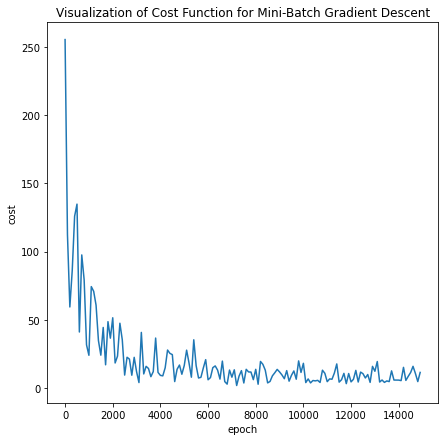

In [17]:
plt.figure(figsize=(7,7))
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list2,cost_list2)
plt.title("Visualization of Cost Function for Mini-Batch Gradient Descent")
plt.show()